In [1]:
# impoort libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
# import dataset
dataset=pd.read_csv('Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Data Visualisation

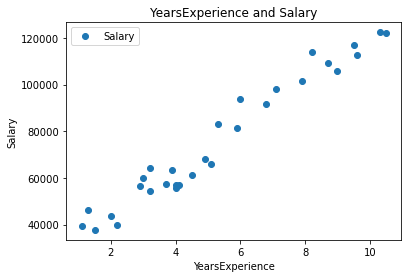

In [5]:
dataset.plot(x='YearsExperience', y='Salary', style='o') 
plt.title('YearsExperience and Salary')  
plt.xlabel('YearsExperience') 
plt.ylabel('Salary')
plt.show()

In [6]:
# To Check the relationship between two variables i.e YearsExperience and Salary

In [7]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(dataset['YearsExperience'], dataset['Salary'])
print('Pearsons correlation: %.3f' % corr)

from scipy.stats import spearmanr
# calculate spearman's correlation
corr, _ = spearmanr(dataset['YearsExperience'], dataset['Salary'])
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: 0.978
Spearmans correlation: 0.957


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


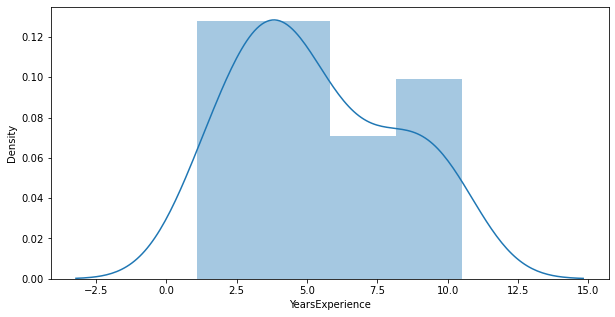

In [10]:
import seaborn as sns
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.distplot(dataset['YearsExperience'])
plt.show() 

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


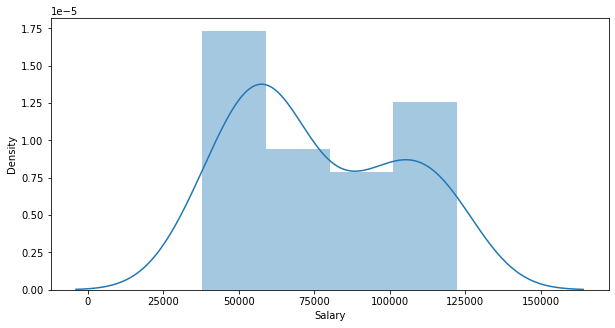

In [11]:
import seaborn as sns
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.distplot(dataset['Salary'])
plt.show() 

# Linear Regression with Logrithm Transformation
y= a+ b* log(x)

In [12]:
# Input dataset
X_log = np.log(dataset['YearsExperience'].values.reshape(-1,1))

# Output or Predicted Value of data
y_log = dataset['Salary'].values.reshape(-1,1)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [15]:
# train and test split
X_train_log, X_test_1og, Y_train_log, Y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state= 42)

In [16]:
y_pred_log= LinearRegression()
y_pred_log.fit(X_train_log,Y_train_log)

LinearRegression()

In [17]:
print(" Intercept value of Model is " ,y_pred_log.intercept_)
print("Co-efficient Value of Log Model is : ", y_pred_log.coef_)

 Intercept value of Model is  [16808.04207062]
Co-efficient Value of Log Model is :  [[39297.91674992]]


In [18]:
l_model= y_pred_log.predict(X_test_1og)
l_model

array([[105690.62002247],
       [ 79261.67485733],
       [ 99496.13089578],
       [ 82345.44586818],
       [ 62517.44576196],
       [ 68222.79629842]])

In [19]:
pmsh_pf_1 = pd.DataFrame({'Actual':Y_test_log.flatten(), 'Predict': l_model.flatten()})
pmsh_pf_1

,Actual,Predict
0,112635.0,105690.620022
1,67938.0,79261.674857
2,113812.0,99496.130896
3,83088.0,82345.445868
4,64445.0,62517.445762
5,57189.0,68222.796298


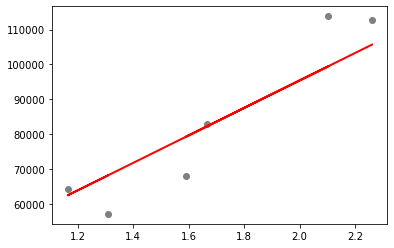

In [20]:
plt.scatter(X_test_1og, Y_test_log,  color='gray')
plt.plot(X_test_1og, l_model, color='red', linewidth=2)
plt.show()

In [ ]:
# Calculate Error Rate of the Logrithm Transformation model.

In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_log, l_model))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_log, l_model) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_log, l_model)))
print("R^2 Score :          ", metrics.r2_score(Y_test_log, l_model))

Mean Absolute Error: 7714.638101223965
Mean Squared Error: 84567607.74831854
Root Mean Squared Error: 9196.064796874723
R^2 Score :           0.8344395471211845
